In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
#autoreload to take in changes from outside
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
def missing_zero_values_table(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
        columns = {0:'Zero Values',
                   1:'Missing Values',
                   2:'% of Total Values'})
    mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
    mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[mz_table.iloc[:,1] != 0].sort_values( '% of Total Values', ascending=False).round(1)

    return mz_table

In [83]:
pd.set_option("display.max_columns", 100)

In [84]:
features_df = pd.read_csv("/content/training_set_features.csv")
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 36)


,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [81]:
#make respondent_id the index
features_df = features_df.set_index('respondent_id')

In [82]:
missing_zero_values_table(features_df)

,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
employment_occupation,0,13470,50.4,13470,50.4,object
employment_industry,0,13330,49.9,13330,49.9,object
health_insurance,1736,12274,46.0,14010,52.5,float64
income_poverty,0,4423,16.6,4423,16.6,object
doctor_recc_xyz,19139,2160,8.1,21299,79.8,float64
doctor_recc_seasonal,16453,2160,8.1,18613,69.7,float64
rent_or_own,0,2042,7.6,2042,7.6,object
employment_status,0,1463,5.5,1463,5.5,object
marital_status,0,1408,5.3,1408,5.3,object
education,0,1407,5.3,1407,5.3,object


In [85]:
labels_df = pd.read_csv('training_set_labels.csv')
print('labels_df.shape',labels_df.shape)
labels_df.head()

labels_df.shape (26707, 3)


,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [87]:
#make the respondent_id the index
labels_df = labels_df.set_index('respondent_id')

KeyError: "None of ['respondent_id'] are in the columns"

In [ ]:
features_df['child_under_6_months'].isna().sum()

In [88]:
features_df['health_insurance'].isna().sum()

12274

In [89]:
#Checks that the number of rows match up. Will error if the two arrays don't match up
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

In [90]:
#Merge training dataset and labels
entire_df = pd.merge(features_df, labels_df, on="respondent_id", how='inner')
entire_df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [91]:
def check_null(df):

    """ Takes in a Pandas DataFrame and returns a Pandas DataFrame displaying the number of null values
    for each column in the original DataFrame, as well as the total percent of each column that is
    made up of null values.
    """

    import pandas as pd

    missing_vals = pd.DataFrame()
    missing_vals['Number of Nulls'] = df.isna().sum()
    missing_vals['% Null'] = (df.isna().sum() / len(df)) * 100

    return missing_vals


In [92]:
## display the number and percent of NaN's in each column
check_null(entire_df)

,Number of Nulls,% Null
respondent_id,0,0.000000
xyz_concern,92,0.344479
xyz_knowledge,116,0.434343
behavioral_antiviral_meds,71,0.265848
behavioral_avoidance,208,0.778822
behavioral_face_mask,19,0.071142
behavioral_wash_hands,42,0.157262
behavioral_large_gatherings,87,0.325757
behavioral_outside_home,82,0.307036
behavioral_touch_face,128,0.479275


In [93]:
import missingno

<Axes: >

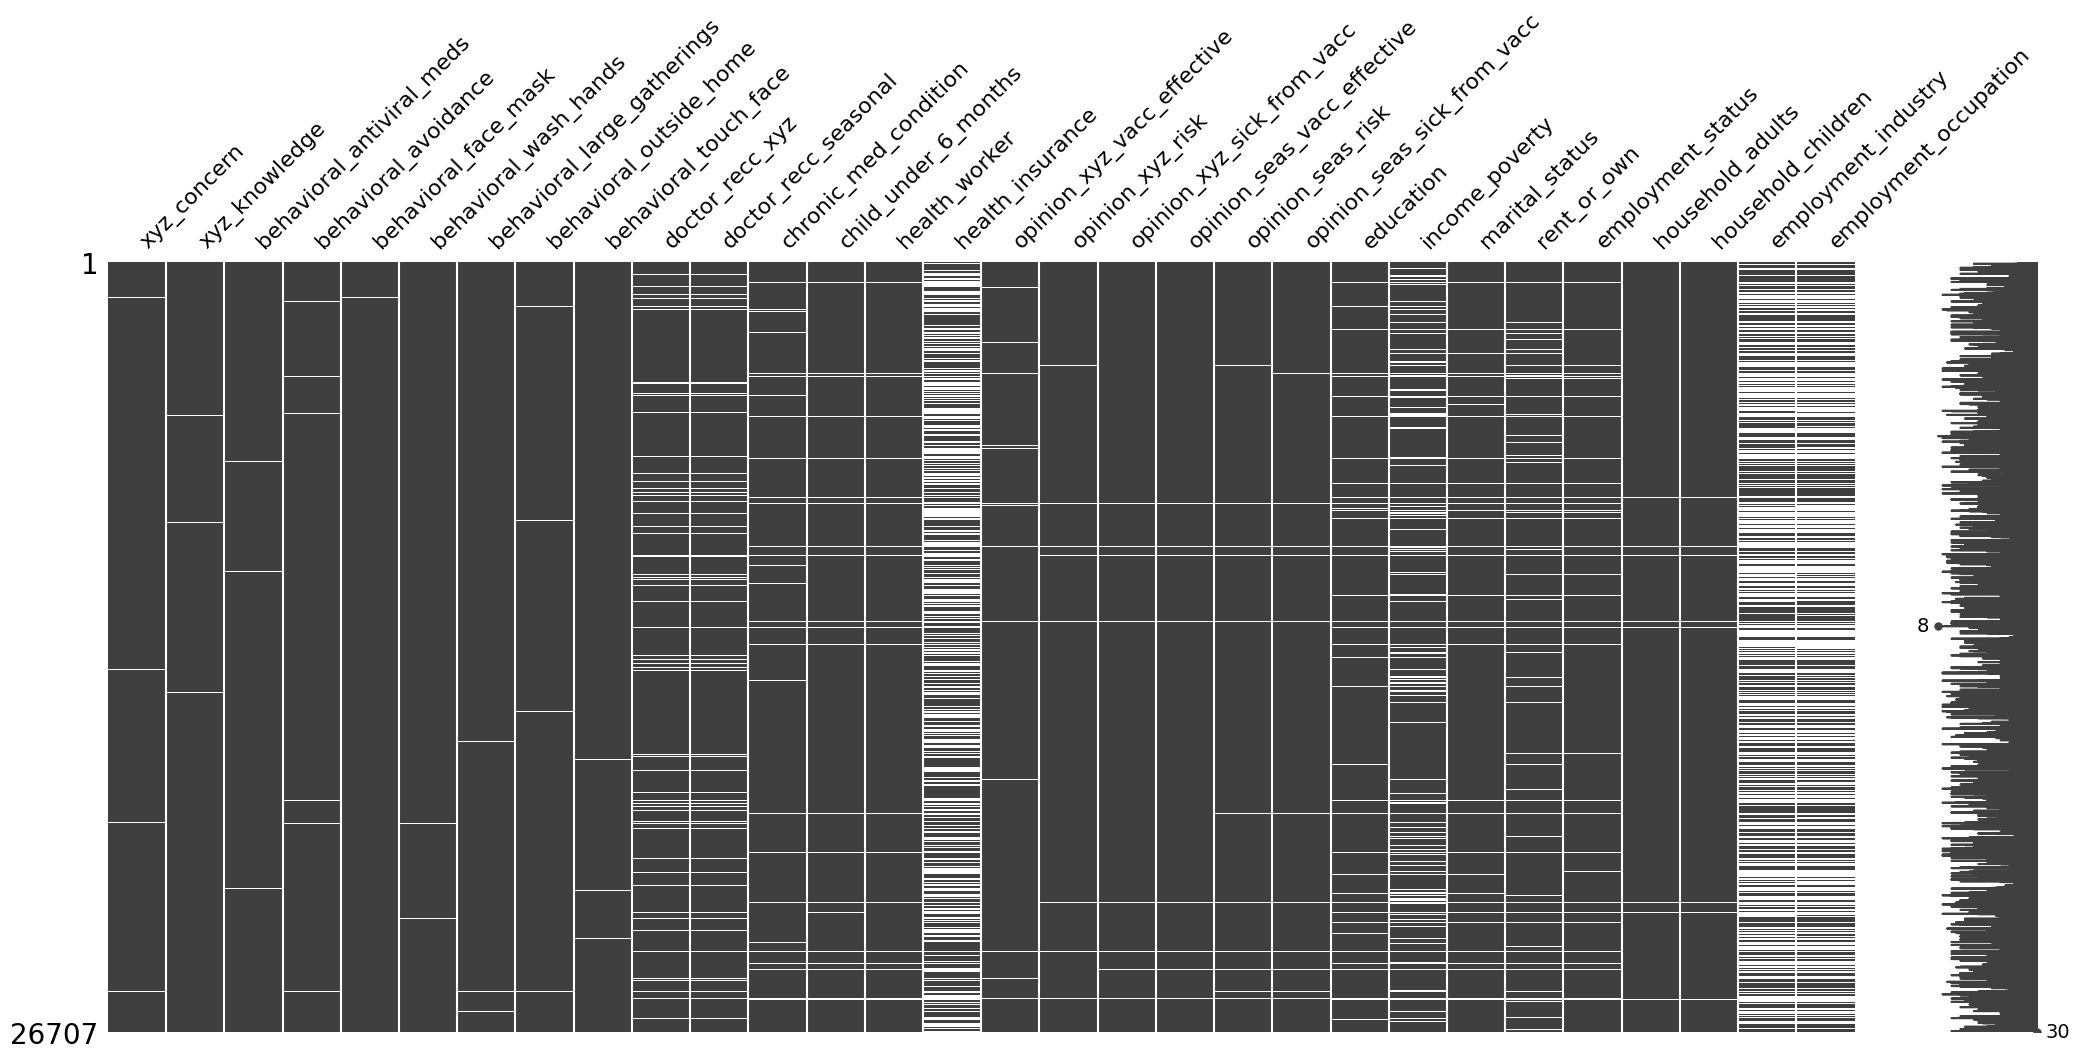

In [94]:
## create a list of cols without any null values to be dropped from missingno.matrix
no_null_cols = [col for col in entire_df.columns if entire_df[col].isna().sum()==0]

## drop columns without missing info to get a clearer view of patterns
missingno.matrix(entire_df.drop(columns=no_null_cols, axis=1))

# plt.savefig(fig_filepath+'missingo_matrix_all', bbox_inches = "tight")

In [95]:
entire_df.drop(columns=['behavioral_antiviral_meds','marital_status','rent_or_own'], axis=1, inplace=True)

In [97]:
# create a DataFrame to show columns with % Null between 0 and 5%
null_df = check_null(entire_df)
null_df.drop(index=null_df.loc[null_df['% Null']==0].index, axis=0, inplace=True)
under_5_null = null_df.loc[null_df['% Null']<5]
under_5_null

,Number of Nulls,% Null
xyz_concern,92,0.344479
xyz_knowledge,116,0.434343
behavioral_avoidance,208,0.778822
behavioral_face_mask,19,0.071142
behavioral_wash_hands,42,0.157262
behavioral_large_gatherings,87,0.325757
behavioral_outside_home,82,0.307036
behavioral_touch_face,128,0.479275
chronic_med_condition,971,3.635751
child_under_6_months,820,3.070356


In [99]:
# drop records with null values for the above columns, composed of less than 5% null values
under_5_null_cols = list(under_5_null.index)
entire_df.dropna(subset=under_5_null_cols, inplace=True)

## check out the resulting df
check_null(entire_df)


,Number of Nulls,% Null
respondent_id,0,0.000000
xyz_concern,0,0.000000
xyz_knowledge,0,0.000000
behavioral_avoidance,0,0.000000
behavioral_face_mask,0,0.000000
behavioral_wash_hands,0,0.000000
behavioral_large_gatherings,0,0.000000
behavioral_outside_home,0,0.000000
behavioral_touch_face,0,0.000000
doctor_recc_xyz,1837,7.391164


<Axes: >

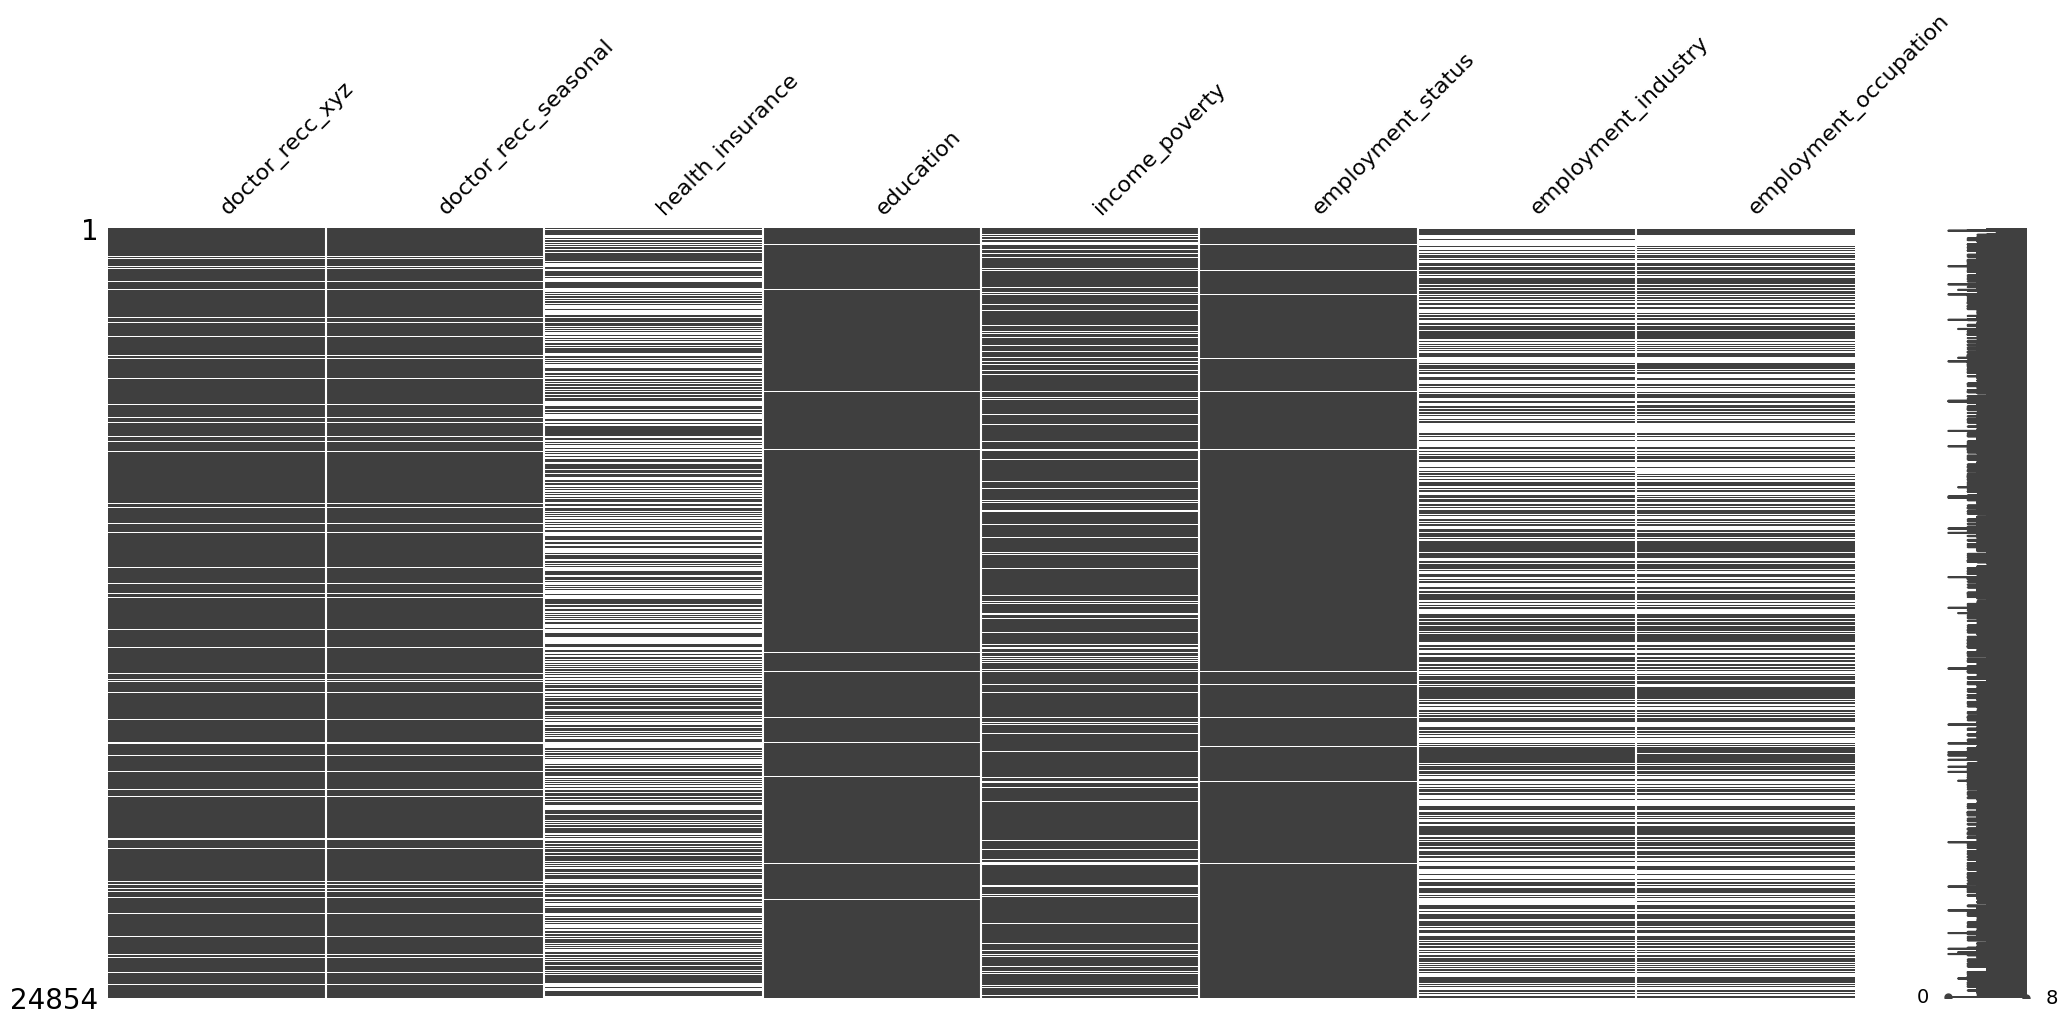

In [100]:
## create a list of cols without any null values to be dropped from missingno.matrix
no_null_cols = [col for col in entire_df.columns if entire_df[col].isna().sum()==0]

## drop columns without missing info to get a clearer view of patterns
missingno.matrix(entire_df.drop(columns=no_null_cols, axis=1))

In [102]:
def check_unique(df, col, dropna=False):

    """Takes in a Pandas DataFrame and specific column name and returns a Pandas DataFrame
    displaying the unique values in that column as well as the count of each unique value.
    Default is to also provide a count of NaN values.
    """

    import pandas as pd

    unique_vals = pd.DataFrame(df[col].value_counts(dropna=dropna))

    return unique_vals

In [104]:
## print out the counts of unique values appearing in each column, including counts of NaN
for col in entire_df.columns:
    display(check_unique(entire_df, col))

,count
respondent_id,
0,1
17779,1
17802,1
17801,1
17800,1
...,...
8900,1
8899,1
8898,1


,count
xyz_concern,
2.0,9987
1.0,7654
3.0,4243
0.0,2970


,count
xyz_knowledge,
1.0,13725
2.0,9030
0.0,2099


,count
behavioral_avoidance,
1.0,18171
0.0,6683


,count
behavioral_face_mask,
0.0,23165
1.0,1689


,count
behavioral_wash_hands,
1.0,20593
0.0,4261


,count
behavioral_large_gatherings,
0.0,15938
1.0,8916


,count
behavioral_outside_home,
0.0,16487
1.0,8367


,count
behavioral_touch_face,
1.0,16962
0.0,7892


,count
doctor_recc_xyz,
0.0,17900
1.0,5117
NaN,1837


,count
doctor_recc_seasonal,
0.0,15367
1.0,7650
NaN,1837


,count
chronic_med_condition,
0.0,17834
1.0,7020


,count
child_under_6_months,
0.0,22789
1.0,2065


,count
health_worker,
0.0,22040
1.0,2814


,count
health_insurance,
1.0,12189
NaN,10997
0.0,1668


,count
opinion_xyz_vacc_effective,
4.0,11226
5.0,6868
3.0,4191
2.0,1768
1.0,801


,count
opinion_xyz_risk,
2.0,9480
1.0,7610
4.0,5175
5.0,1666
3.0,923


,count
opinion_xyz_sick_from_vacc,
2.0,8672
1.0,8476
4.0,5532
5.0,2067
3.0,107


,count
opinion_seas_vacc_effective,
4.0,11107
5.0,9504
2.0,2088
1.0,1117
3.0,1038


,count
opinion_seas_risk,
2.0,8542
4.0,7335
1.0,5581
5.0,2851
3.0,545


,count
opinion_seas_sick_from_vacc,
1.0,11285
2.0,7260
4.0,4622
5.0,1616
3.0,71


,count
age_group,
65+ Years,6230
55 - 64 Years,5232
45 - 54 Years,4929
18 - 34 Years,4870
35 - 44 Years,3593


,count
education,
College Graduate,9754
Some College,6803
12 Years,5552
< 12 Years,2221
NaN,524


,count
race,
White,19789
Black,1938
Hispanic,1664
Other or Multiple,1463


,count
sex,
Female,14823
Male,10031


,count
income_poverty,
"<= $75,000, Above Poverty",12346
"> $75,000",6652
NaN,3296
Below Poverty,2560


,count
employment_status,
Employed,13156
Not in Labor Force,9721
Unemployed,1405
NaN,572


,count
hhs_geo_region,
lzgpxyit,3953
fpwskwrf,3007
qufhixun,2921
oxchjgsf,2692
bhuqouqj,2674
kbazzjca,2651
mlyzmhmf,2080
lrircsnp,1931
atmpeygn,1923


,count
census_msa,
"MSA, Not Principle City",10867
"MSA, Principle City",7242
Non-MSA,6745


,count
household_adults,
1.0,13699
0.0,7424
2.0,2667
3.0,1064


,count
household_children,
0.0,17437
1.0,3019
2.0,2734
3.0,1664


,count
employment_industry,
NaN,11871
fcxhlnwr,2396
wxleyezf,1752
ldnlellj,1189
pxcmvdjn,1008
atmlpfrs,900
arjwrbjb,850
xicduogh,824
mfikgejo,599


,count
employment_occupation,
NaN,11998
xtkaffoo,1725
mxkfnird,1469
emcorrxb,1242
cmhcxjea,1222
xgwztkwe,1051
hfxkjkmi,741
qxajmpny,527
xqwwgdyp,474


,count
xyz_vaccine,
0,19518
1,5336


,count
seasonal_vaccine,
0,13202
1,11652


In [105]:
entire_df.shape

(24854, 35)

In [106]:
#Work on poverty column
def fillpoverty(row):
    if row['age_group'] == "65+ Years" and row['employment_status'] == "Not in Labor Force":
        return "Retired"
    elif row['employment_status'] == "Unemployed" or row['employment_status'] == "Not in Labor Force":
        return "Unemployed"
    else:
        return "N/A"

In [107]:
entire_df["income_poverty"] = entire_df.apply(lambda x: fillpoverty(x) if pd.isnull(x['income_poverty']) else x['income_poverty'], axis = 1)

In [108]:
#prune out all the null employment_status
entire_df = entire_df[entire_df['employment_status'].notna()]

In [109]:
entire_df.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

**XYZ_vaccine and Seasonal Vaccine**

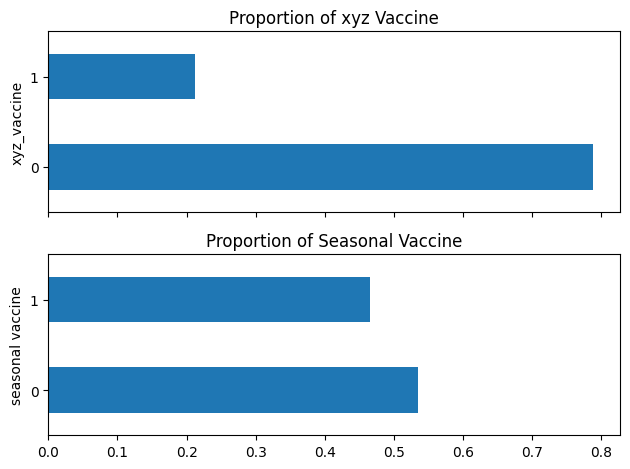

In [110]:
#Show distribution between h1n1_vaccine and Seasonal Vaccine
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

#xyz Vaccine
labels_df['xyz_vaccine'].value_counts().div(n_obs).plot.barh(title="Proportion of xyz Vaccine", ax=ax[0])
ax[0].set_ylabel("xyz_vaccine")

#Seasonal Vaccine
labels_df['seasonal_vaccine'].value_counts().div(n_obs).plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
ax[1].set_ylabel("seasonal vaccine")

fig.tight_layout()

In [111]:
entire_df.isna().sum()

respondent_id                      0
xyz_concern                        0
xyz_knowledge                      0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_xyz                 1791
doctor_recc_seasonal            1791
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance               10520
opinion_xyz_vacc_effective         0
opinion_xyz_risk                   0
opinion_xyz_sick_from_vacc         0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                        133
race                               0
sex                                0
income_poverty                     0
employment_status                  0
h

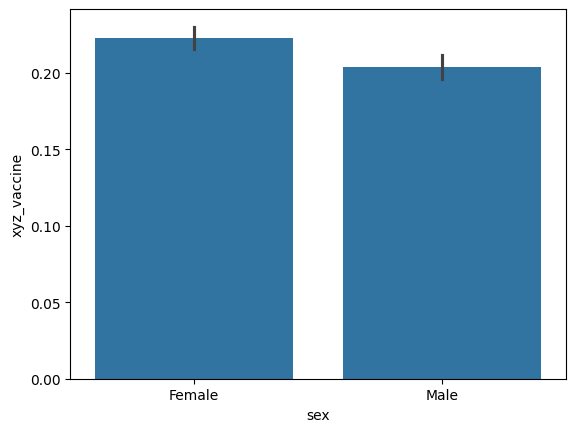

In [112]:
import seaborn as sns
# Gender and xyz vaccination status bar graph
sns.barplot(x=entire_df['sex'], y=entire_df['xyz_vaccine']);

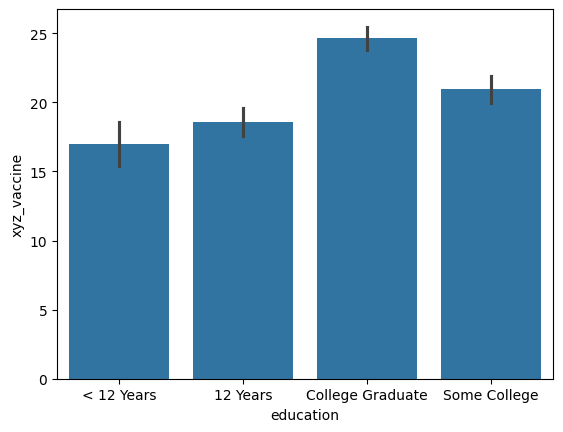

In [113]:
# Education level percentage distribution of the vaccinated people
sns.barplot(x=entire_df['education'], y=entire_df['xyz_vaccine']*100);

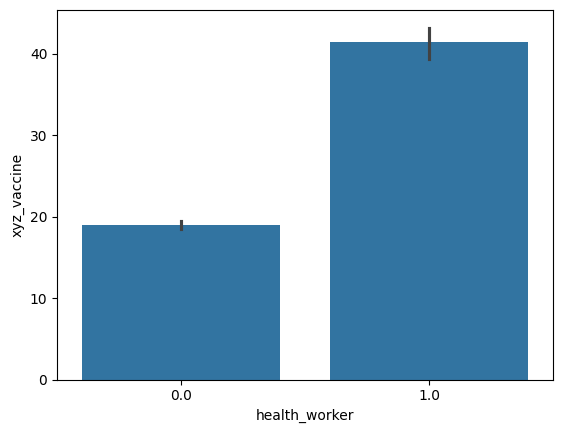

In [114]:
# Distribution of health workers who got the vaccine
sns.barplot(x=entire_df['health_worker'], y=entire_df['xyz_vaccine']*100);

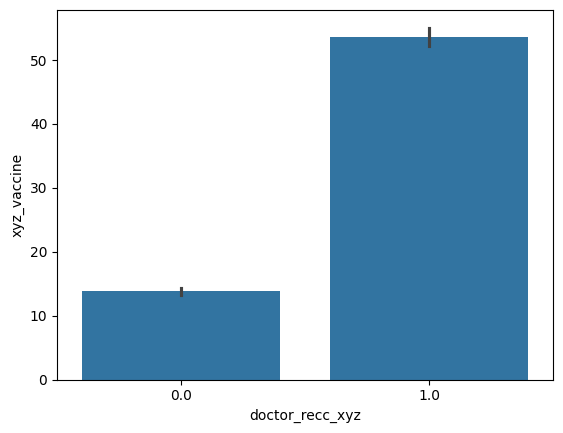

In [115]:
# Doctor recommendation vs H1N1 vaccine
sns.barplot(x=entire_df['doctor_recc_xyz'], y=entire_df['xyz_vaccine']*100);

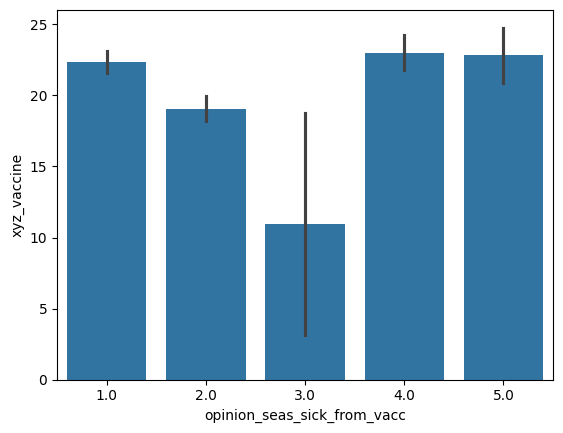

In [116]:
# Doctor opinion_seas_sick_from_vacc vs H1N1 vaccine
sns.barplot(x=entire_df['opinion_seas_sick_from_vacc'], y=entire_df['xyz_vaccine']*100);

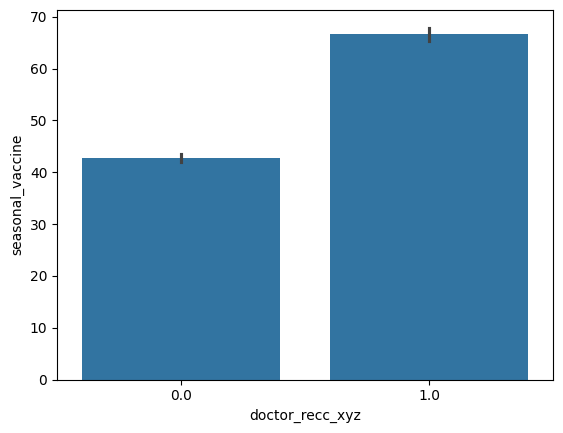

In [117]:
# Doctor recommendation vs H1N1 vaccine
sns.barplot(x=entire_df['doctor_recc_xyz'], y=entire_df['seasonal_vaccine']*100);

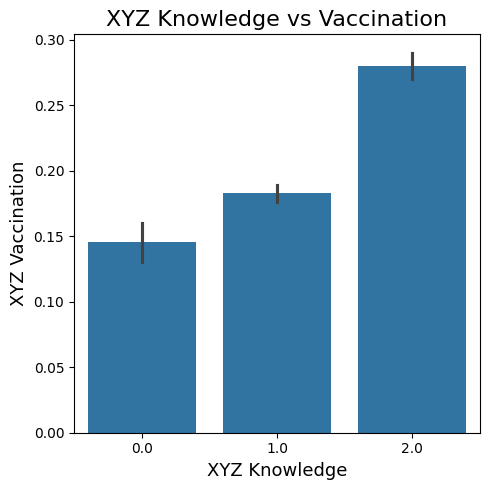

In [118]:
# Setting the size of the plot
plt.figure(figsize = (5,5))
# Creating the bar plot with X = h1n1_knowledge and Y = h1n1_vaccine
sns.barplot(data = entire_df, x=entire_df['xyz_knowledge'], y=entire_df['xyz_vaccine'])
# Setting title and labels
plt.title('XYZ Knowledge vs Vaccination', fontsize=16)
plt.xlabel('XYZ Knowledge', fontsize=13)
plt.ylabel('XYZ Vaccination', fontsize=13)
plt.tight_layout();

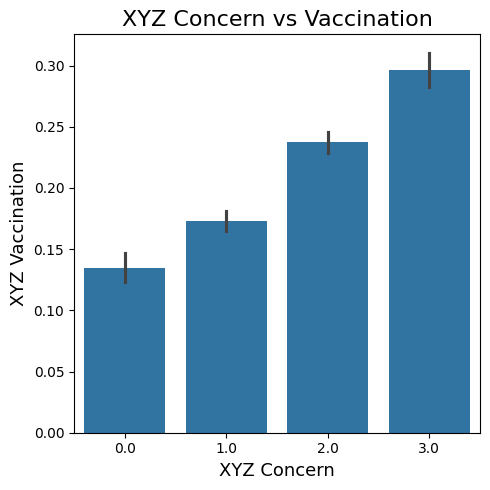

In [119]:
# Setting the size of the plot
plt.figure(figsize = (5,5))
# Creating the bar plot with X = xyz_knowledge and Y = xyz_concern
sns.barplot(data = entire_df, x=entire_df['xyz_concern'], y=entire_df['xyz_vaccine'])
# Setting title and labels
plt.title('XYZ Concern vs Vaccination', fontsize=16)
plt.xlabel('XYZ Concern', fontsize=13)
plt.ylabel('XYZ Vaccination', fontsize=13)
plt.tight_layout();

**We can seethat 20% of the surveyed people took xyz_vaccine, whereas roughly half of them took seasonal vaccine**

In [120]:
pd.crosstab(
    labels_df['xyz_vaccine'],
    labels_df['seasonal_vaccine'],
    margins = True,
    normalize = True)

seasonal_vaccine,0,1,All
xyz_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [121]:
counts = (entire_df[['xyz_concern', 'xyz_vaccine']]
            .groupby(['xyz_concern', 'xyz_vaccine'])
            .size()
             .unstack('xyz_vaccine'))

counts

xyz_vaccine,0,1
xyz_concern,,
0.0,2504,389
1.0,6203,1297
2.0,7456,2323
3.0,2892,1218


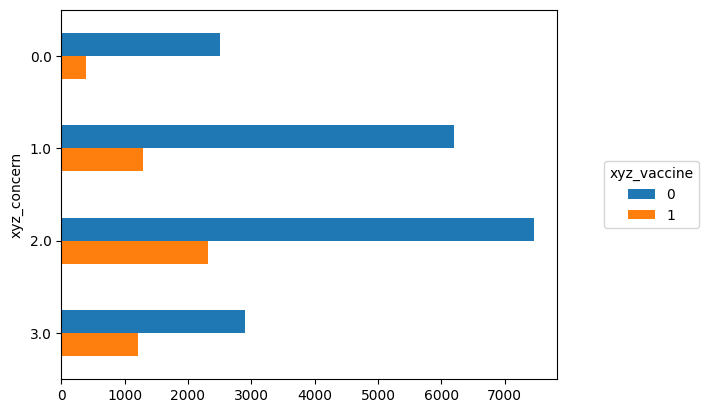

In [122]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right',
    bbox_to_anchor=(1.3,0.5),
    title='xyz_vaccine'
)

In [123]:
#Number of concerts for h1n1
xyz_concern_counts = counts.sum(axis='columns')
xyz_concern_counts

xyz_concern
0.0    2893
1.0    7500
2.0    9779
3.0    4110
dtype: int64

In [124]:
props = counts.div(xyz_concern_counts, axis='index')
props

xyz_vaccine,0,1
xyz_concern,,
0.0,0.865538,0.134462
1.0,0.827067,0.172933
2.0,0.762450,0.237550
3.0,0.703650,0.296350


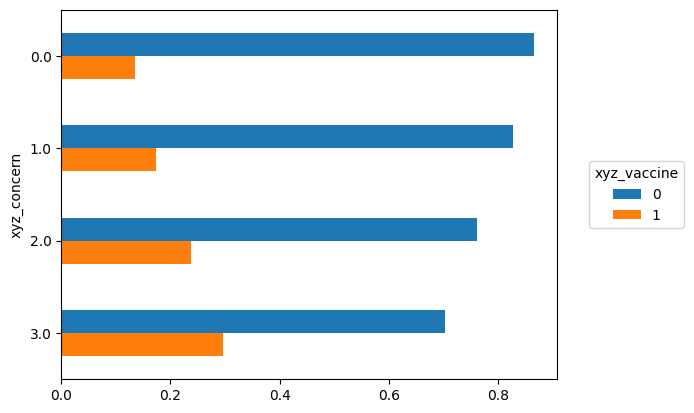

In [125]:
#Plot another bar chart relative to percentage within each concern level.

ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc = 'center left',
    bbox_to_anchor=(1.05, 0.5),
    title='xyz_vaccine')

**We see that as concern for h1n1 goes higher, the greater the percentage of people getting the vaccine**

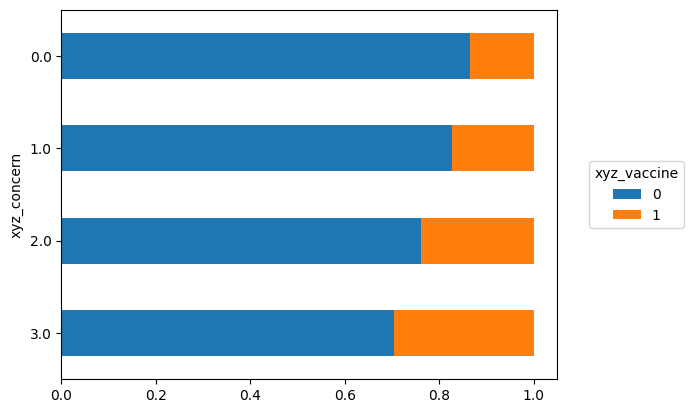

In [126]:
#Slightly different plot for easier viewing

ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    title='xyz_vaccine')

In [127]:
cols_to_plot = [
    'xyz_concern',
    'xyz_knowledge',
    'opinion_xyz_vacc_effective',
    'opinion_xyz_risk',
    'opinion_xyz_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race'
]

In [129]:
def vaccination_rate_plot(col, target, data, ax=None):
    counts = (entire_df[[target, col]]
                 .groupby([target,col])
                 .size()
                 .unstack(target))
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind='barh', stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

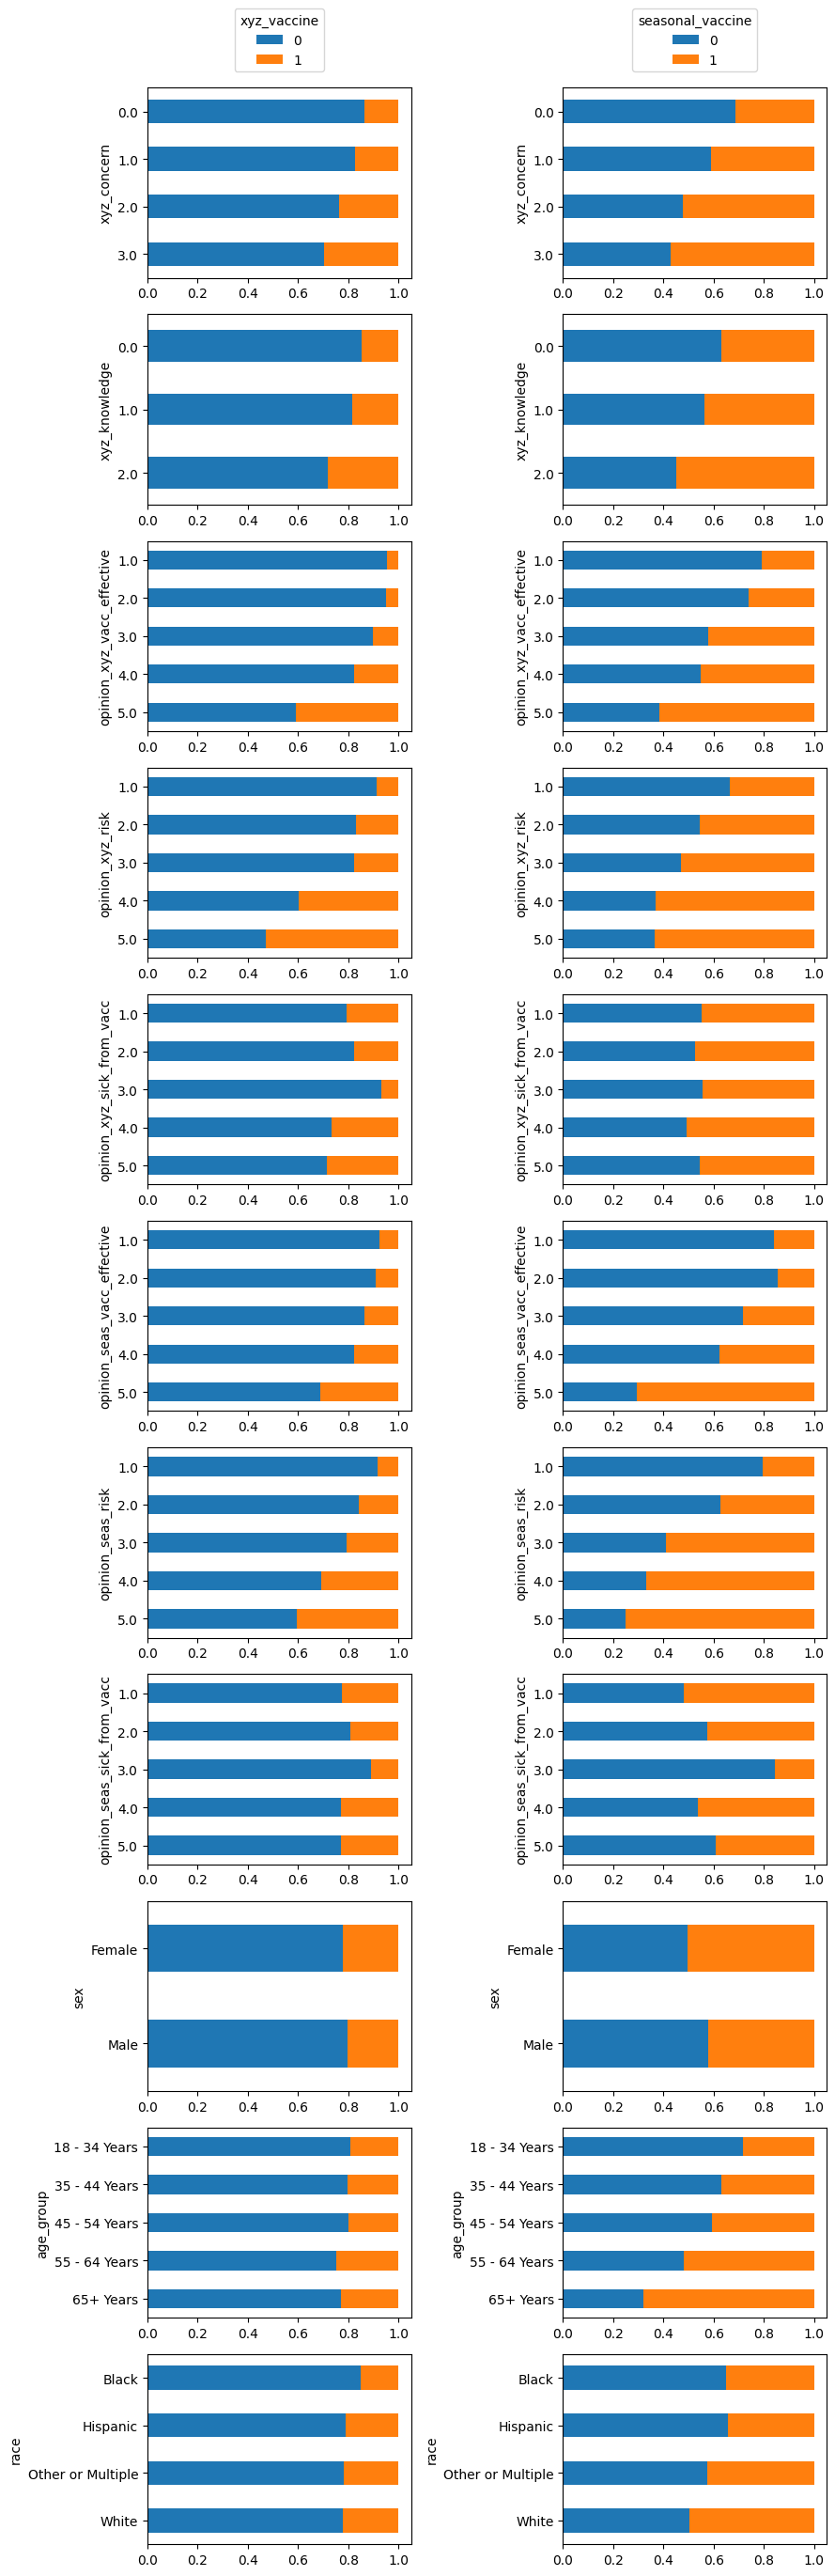

In [130]:
fig, ax = plt.subplots(len(cols_to_plot), 2, figsize=(9, len(cols_to_plot)*2.5))
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(col, 'xyz_vaccine', entire_df, ax=ax[idx, 0])
    vaccination_rate_plot(col, 'seasonal_vaccine', entire_df, ax=ax[idx,1])

ax[0,0].legend(loc='lower center', bbox_to_anchor=(0.5,1.05), title='xyz_vaccine')
ax[0,1].legend(loc='lower center', bbox_to_anchor=(0.5,1.05), title='seasonal_vaccine')
fig.tight_layout()

**The demographic features have stronger correlation with seasonal_vaccine, but much less so far h1n1_vaccine. As age_group goes up, there is a strong correlation with getting the seasonal vaccine. But in terms of h1n1 vaccine, it was steadily the same throughout the age groups.
In terms of race, there isn't a huge correlation with getting the h1n1 vaccine. But in terms of the seasonal flu, we see that caucasians have a slightly higher rate compared to other races.**

**Modeling**

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

**Using scikit-learn's logistic regression as a simiple model since it can take any number of categorical variables with numerical values.**

In [132]:
#Getting the numerical categories only
numeric_cols = features_df.columns[features_df.dtypes != "object"].values

In [133]:
numeric_cols

array(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective',
       'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'], dtype=object)

**Creating a preprocessing and imputation pipeline**

In [134]:
#Chain preprocessing into a Pipeline object

#Each step is a tuple (w.e name, sklearn transformer)
numeric_preprocessing_steps = Pipeline([('standard_scaler', StandardScaler()),
                                        ('simple_imputer', SimpleImputer(strategy='median'))])

#Creating the preprocessor stage of final pipeline

#Each entry in the transformer list is a tuple (w.e name, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(transformers = [('numeric', numeric_preprocessing_steps, numeric_cols)], remainder = "drop")

**Estimator
Using MultiOutputClassifier because we're predicting two labels and easier to run both at the same time.**

In [135]:
estimators = MultiOutputClassifier(
    estimator = LogisticRegression(penalty='l2', C=1))

In [136]:
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('estimators', estimators),
])

In [137]:
import sklearn
print(sklearn.__version__)

1.2.2


In [138]:
from sklearn import set_config
set_config('diagram')

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective',
       'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'], dtype=object))])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1)))])

**Training and Evaluation**

In [139]:
RANDOM_SEED = 7

X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

In [140]:
y_train

,xyz_vaccine,seasonal_vaccine
respondent_id,,
12159,0,1
17325,0,0
12636,0,0
6596,1,1
21971,0,1
...,...,...
18994,0,0
17455,1,0
17278,0,1


In [141]:
%%time

#Training the model
full_pipeline.fit(X_train, y_train)

#Predict on evaluation set
preds = full_pipeline.predict_proba(X_eval)
preds

CPU times: user 105 ms, sys: 54 ms, total: 159 ms
Wall time: 113 ms


[array([[0.10474062, 0.89525938],
        [0.90307307, 0.09692693],
        [0.91542937, 0.08457063],
        ...,
        [0.78237574, 0.21762426],
        [0.96928702, 0.03071298],
        [0.88861855, 0.11138145]]),
 array([[0.04255125, 0.95744875],
        [0.15092364, 0.84907636],
        [0.77956509, 0.22043491],
        ...,
        [0.54719747, 0.45280253],
        [0.88490757, 0.11509243],
        [0.51994882, 0.48005118]])]

**Creating a dataframe to see the probability that respondent will get xyz vaccine and seasonal vaccine**

In [142]:
y_preds = pd.DataFrame(
    {
        'xyz_vaccine': preds[0][:,1],
        'seasonal_vaccine':preds[1][:,1],
    },
    index=y_eval.index
)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,xyz_vaccine,seasonal_vaccine
respondent_id,,
6012,0.895259,0.957449
13580,0.096927,0.849076
23267,0.084571,0.220435
13110,0.423085,0.258666
967,0.331891,0.894029


In [143]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0,1], [0,1], color='red', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

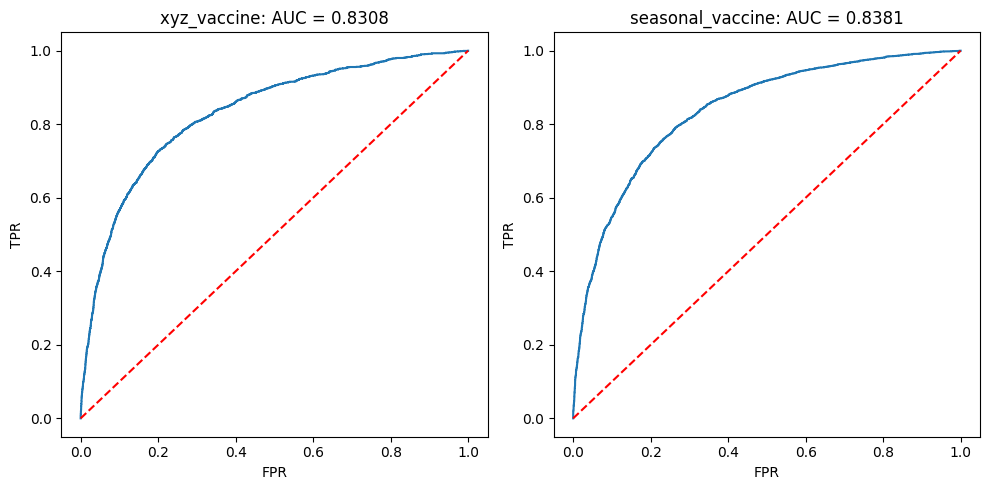

In [145]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

plot_roc(
    y_eval['xyz_vaccine'],
    y_preds['xyz_vaccine'],
    'xyz_vaccine',
    ax=ax[0])

plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1])

fig.tight_layout()

**An AUC score of 0.5 is no better than random, and AUC score of 1.0 is a perfect model**

In [146]:
roc_auc_score(y_eval, y_preds)

0.834453837554235

In [147]:
y_preds.to_csv('/content/submission.csv')

Current AUC of **0.83445**

**We see that as concern for xyz goes higher, the greater the percentage of people getting the vaccine**

